PC1 explains 73.0% variance
PC2 explains 22.9% variance
Total explained: 95.8%


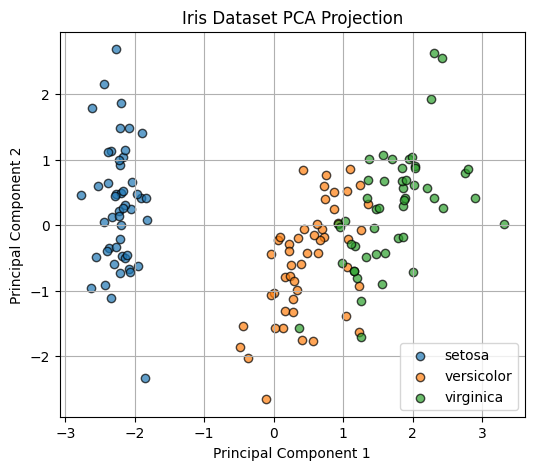

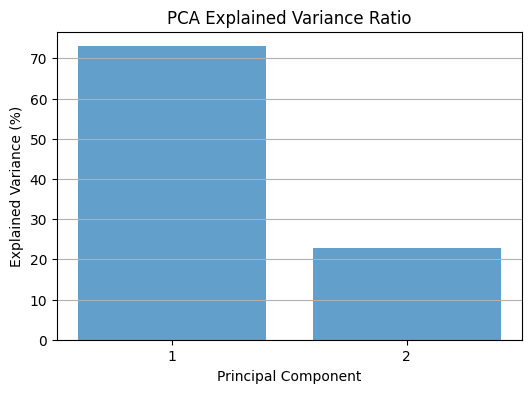

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# 1. データ読み込み
data = load_iris()
X, y = data.data, data.target
target_names = data.target_names

# 2. 標準化
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# 3. PCA で 2 次元へ
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)

# 4. 分散寄与率の確認
explained = pca.explained_variance_ratio_
print(f"PC1 explains {explained[0]*100:.1f}% variance")
print(f"PC2 explains {explained[1]*100:.1f}% variance")
print(f"Total explained: {(explained.sum())*100:.1f}%")

# 5. 投影図の可視化
plt.figure(figsize=(6,5))
for i, color in zip(range(3), ['r','g','b']):
    plt.scatter(X_pca[y==i, 0], X_pca[y==i, 1],
                label=target_names[i], alpha=0.7, edgecolor='k')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Iris Dataset PCA Projection')
plt.legend()
plt.grid(True)
plt.show()

# 6. 分散寄与率の棒グラフ
plt.figure(figsize=(6,4))
components = np.arange(1, len(pca.explained_variance_ratio_)+1)
plt.bar(components, pca.explained_variance_ratio_ * 100, alpha=0.7)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance (%)')
plt.title('PCA Explained Variance Ratio')
plt.xticks(components)
plt.grid(axis='y')
plt.show()

In [1]:
from sklearn.datasets import fetch_openml
import numpy as np

# MNIST 読み込み
mnist = fetch_openml('mnist_784', version=1)
X = mnist.data / 255.0  # 标准化数据
y = mnist.target.astype(int)

# ランダムに1000サンプル選択
np.random.seed(42)
indices = np.random.choice(len(X), 1000, replace=False)
X_sample, y_sample = X.iloc[indices], y.iloc[indices]

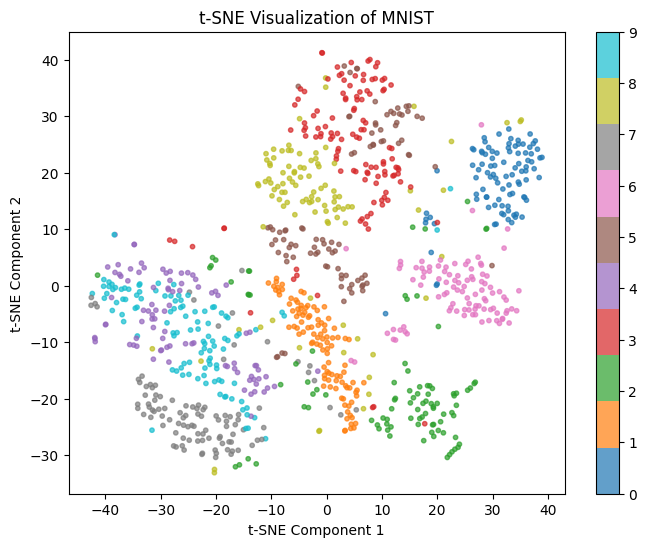

In [2]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# t-SNE で 2 次元へ
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_sample)

# 可視化
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_sample, cmap='tab10', s=10, alpha=0.7)
plt.title("t-SNE Visualization of MNIST")
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.colorbar()
plt.show()

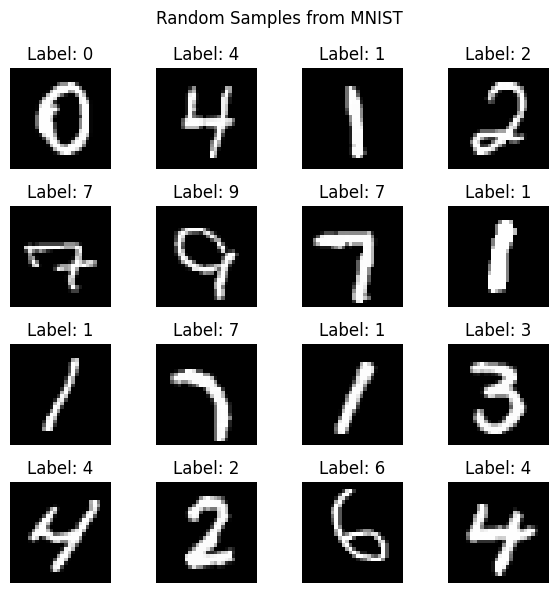

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X, y = mnist['data'], mnist['target'].astype(int)

rng = np.random.RandomState(0)
indices = rng.choice(len(X), 16, replace=False)

plt.figure(figsize=(6,6))
for i, idx in enumerate(indices):
    img = X[idx].reshape(28,28)
    label = y[idx]
    ax = plt.subplot(4, 4, i+1)
    ax.imshow(img, cmap='gray')
    ax.set_title(f"Label: {label}")
    ax.axis('off')
plt.suptitle("Random Samples from MNIST")
plt.tight_layout()
plt.show()
